In [4]:
import numpy as np
import nltk
import string
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [459]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Reading Dataset**
Dataset Link: [Link](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [460]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_DataScience/email/spam.csv', encoding='lat')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [461]:
df.shape

(5624, 5)

# **Cleaning the dataset**


1.   Removing Null value columns
2.   Renaming columns
3.   Encoding Categorcial data
4.   Removing duplicates and null values



In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5624 non-null   object
 1   v2          5624 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 219.8+ KB


In [463]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [464]:
df.sample(5)

,v1,v2
748,ham,Is there a reason we've not spoken this year? ...
4339,ham,I want to sent &lt;#&gt; mesages today. Thats...
1023,ham,May i call You later Pls
1080,ham,You tell what happen dont behave like this to ...
511,ham,Prabha..i'm soryda..realy..frm heart i'm sory


In [465]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5619,ham,Join our webinar on digital marketing strategies.
5620,spam,You're selected for a free gift card. Claim it...
5621,spam,Congratulations! You've won a luxury vacation ...
5622,spam,Earn big money fast! Work from home and make t...


In [466]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [467]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [468]:
df.duplicated().sum()

410

In [469]:
df.drop_duplicates(keep='first', inplace=True)

In [470]:
df.duplicated().sum()

0

In [471]:
df.shape

(5214, 2)

# **Exploratory Data Analysis**

In [473]:
df['target'].value_counts()
#0- ham
#1- spam

0    4526
1     688
Name: target, dtype: int64

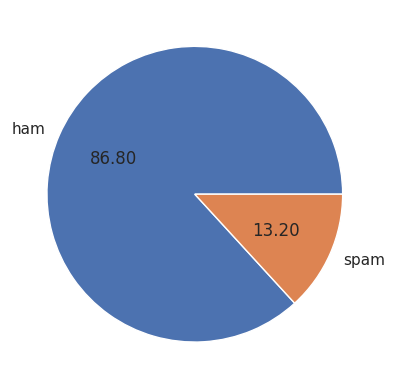

In [474]:
plt.pie(df['target'].value_counts(), autopct="%0.2f")
plt.show()

In [475]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [476]:
df['num_chars']=df['text']
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [532]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goes usf lives around though na...


In [478]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [479]:
df[['num_chars', 'num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,5214.000000,5214.000000,5214.000000
mean,79.502301,18.494630,1.967587
std,59.299594,13.462777,1.448358
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [480]:
#All Ham messages
df[df['target']==0][['num_chars', 'nu_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,4526.000000,4526.000000,4526.000000
mean,70.801370,17.142510,1.820592
std,56.807965,13.537401,1.383591
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [481]:
#All Spaam messages
df[df['target']==1][['num_chars', 'num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,688.000000,688.000000,688.000000
mean,136.741279,27.389535,2.934593
std,40.585955,8.772692,1.493341
min,13.000000,2.000000,1.000000
25%,127.000000,24.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,610.000000,127.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

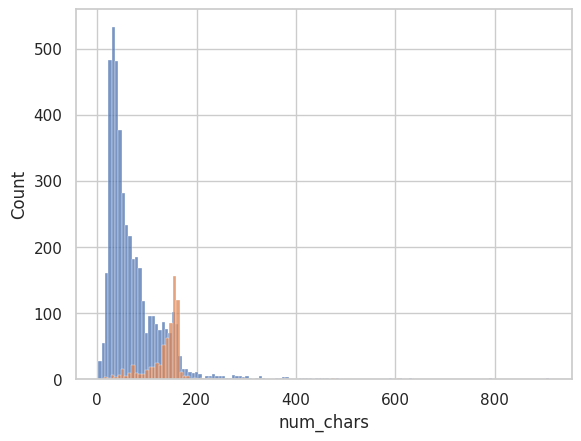

In [482]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'])

<Axes: xlabel='num_words', ylabel='Count'>

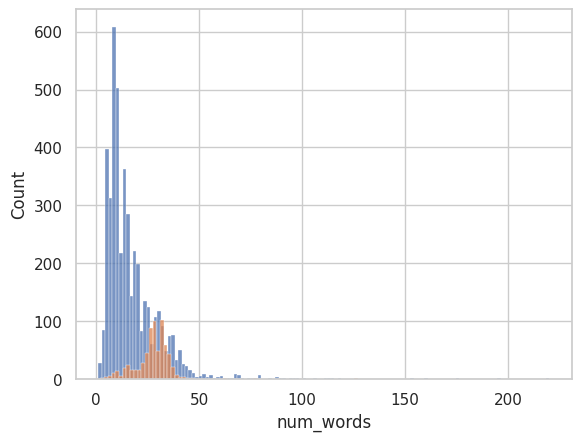

In [483]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])
#More ham has less num of words, whereas more spam messages has more number of words

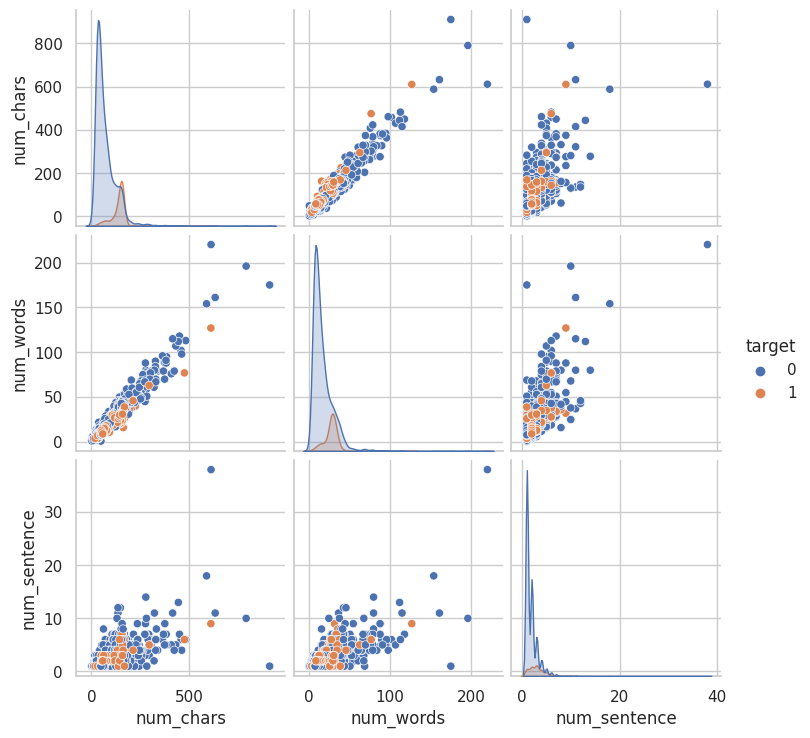

In [484]:
sns.pairplot(df, hue='target')

<ipython-input-533-6dc1c4c1753e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

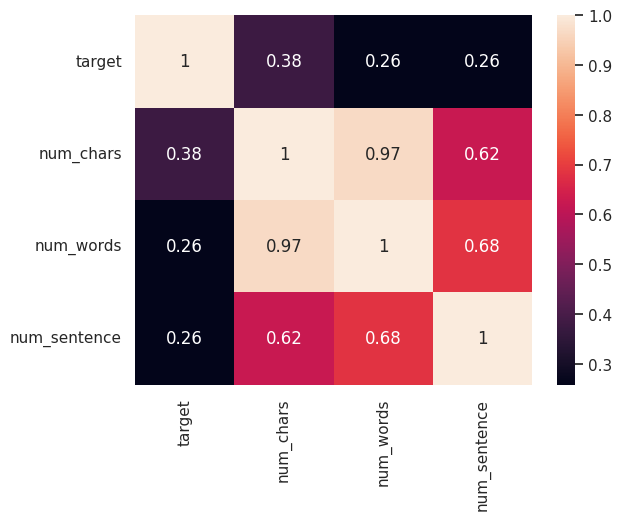

In [533]:
sns.heatmap(df.corr(), annot=True)

# **Data Transformation**

In [487]:
import string
def text_preprocess(text):

  #Convert to lower
  text=text.lower()

  #Tokenize the text
  text=nltk.word_tokenize(text)

  #Removing special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  #Removing stopwords
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #Stemming
  ps=PorterStemmer()
  text=y[:]
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [488]:
df['transformed_text']=df['text'].apply(text_preprocess)

In [489]:
df.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goes usf lives around though na...


# **Word cloud of spam and not spam email messages**

In [490]:
wc=WordCloud(width=500, height=500, background_color='white', min_font_size=10)

**Spam Email Messages**

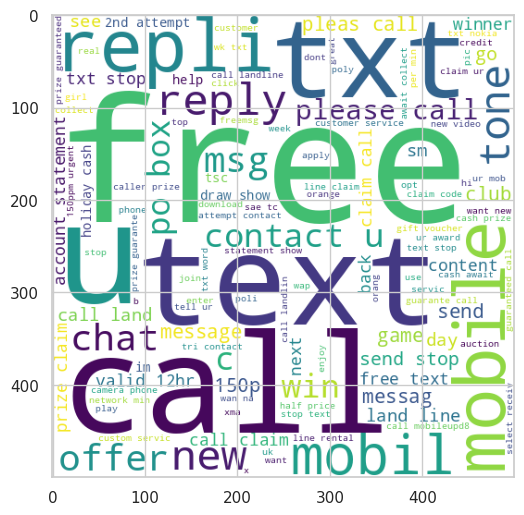

In [491]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

**Not Spam Email Messages**

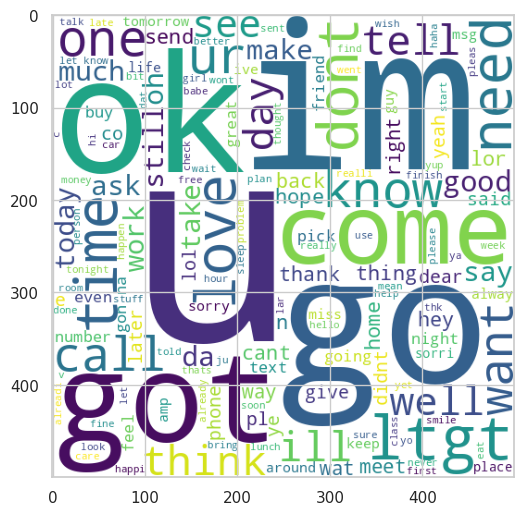

In [492]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

**Top 50 words used in Spam Email Messages**

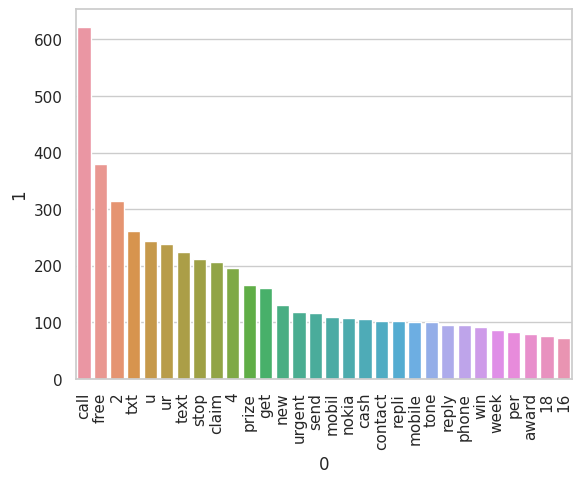

In [493]:
#Top 50 words in spam mails
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

len(spam_corpus)
new_df=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=new_df[2],y=new_df[1])
plt.xticks(rotation="vertical")
plt.show()

**Top 50 words used in Not Spam Email Messages**

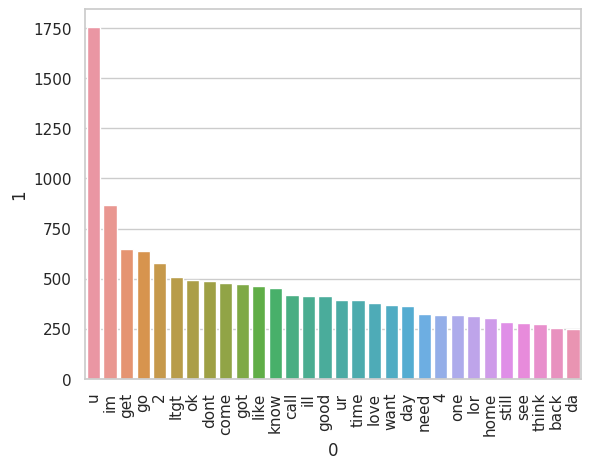

In [494]:
#Top 50 words in ham mails
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
  for word in msg.split():
    ham_corpu.append(word)

len(ham_corpus)
new_df1=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=new_df1[0],y=new_df1[1])
plt.xticks(rotation="vertical")
plt.show()

# **Model Selection**

In [496]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [534]:
tfidf=TfidfVectorizer(max_features=3000)

In [535]:
X3= tfidf.fit_transform(df['transformed_text']).toarray()
y3=df['target'].values

In [500]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=2)

In [536]:
lrc=LogisticRegression(solver='liblinear', penalty='l1')
svc=SVC(kernel='sigmoid', gamma=1.0)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)


In [537]:
clfs={
    'LR': lrc,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'KN': knc,
    'RF': rfc,
    'AdaBoost': abc,
    'ETC':etc,
    'XGB': xgb
}

In [503]:
def metrics_classifier(clf, X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accur=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accur,precision

In [504]:
accu_scores=[]
pre_scores=[]
for name, clf in clfs.items():
  accu_score, pre_score= metrics_classifier(clf, X_train, y_train,X_test, y_test)
  print(f"For {name}")
  print(f"Accuracy {accu_score}")
  print(f"Precision {pre_score}")
  accu_scores.append(accu_score)
  pre_scores.append(pre_score)

For LR
Accuracy 0.9431309904153354
Precision 0.9161290322580645
For SVC
Accuracy 0.9667731629392972
Precision 0.9560439560439561
For NB
Accuracy 0.9712460063897763
Precision 1.0
For DT
Accuracy 0.9246006389776358
Precision 0.8246753246753247
For KN
Accuracy 0.8971246006389776
Precision 1.0
For RF
Accuracy 0.9623003194888179
Precision 0.9704142011834319
For AdaBoost
Accuracy 0.9559105431309904
Precision 0.9209039548022598
For ETC
Accuracy 0.9661341853035144
Precision 0.976878612716763
For XGB
Accuracy 0.9571884984025559
Precision 0.9520958083832335


In [505]:
metrics_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_3000':accu_scores,'Precision_3000':pre_scores }).sort_values('Precision_3000', ascending=False)
metrics_df

,Algorithm,Accuracy_3000,Precision_3000
2,NB,0.971246,1.000000
4,KN,0.897125,1.000000
7,ETC,0.966134,0.976879
5,RF,0.962300,0.970414
1,SVC,0.966773,0.956044
8,XGB,0.957188,0.952096
6,AdaBoost,0.955911,0.920904
0,LR,0.943131,0.916129
3,DT,0.924601,0.824675


In [506]:
metrics_df = metrics_df.sort_values('Accuracy_3000', ascending=False)
fig = px.bar(metrics_df, x='Algorithm', y='Accuracy_3000', text='Accuracy_3000', title='Accuracy Scores for Different Classifiers')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Algorithm', yaxis_title='Accuracy', xaxis_tickangle=-45)
fig.show()


In [539]:
metrics_df = metrics_df.sort_values('Precision_3000', ascending=False)
fig = px.bar(metrics_df, x='Algorithm', y='Precision_3000', text='Precision_3000', title='Precisiom Scores for Different Classifiers')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Algorithm', yaxis_title='Precision', xaxis_tickangle=-45)
fig.show()

# **Prediction**

In [531]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict whether new strings are spam or not
msgs=["[0] Congratulations! You've won a free vacation package to an exotic destination! Claim now!",
      "[1] We're excited to confirm your upcoming interview on 22Aug at 3pm. We look forward to meeting you at our office. If you have any questions, feel free to reach out",
      "[2] Claim your $100 gift card. Just enter your personal information to receive your prize.",
      "[3] You've been selected as a winner of our $1000 gift card giveaway. Claim your prize today!",
      "[4] Your bank account needs attention. Click the link to update your info.",
      "[5] Thank you for registering for our upcoming workshop on 30 Dec 2023 at Delhi. We're looking forward to a great session"]

for i in msgs:
  transformed= text_preprocess(i)
  new_strings_tfidf = tfidf.transform([transformed])
  predictions = clf.predict(new_string_tfidf)

  if predictions == 0:
    print(i)
    print("Output: It is not spam.")
    print("-"*50)
  else:
    print(i)
    print("Output: It is spam.")
    print("-"*50)


[0] Congratulations! You've won a free vacation package to an exotic destination! Claim now!
Output: It is spam.
--------------------------------------------------
[1] We're excited to confirm your upcoming interview on 22Aug at 3pm. We look forward to meeting you at our office. If you have any questions, feel free to reach out
Output: It is not spam.
--------------------------------------------------
[2] Claim your $100 gift card. Just enter your personal information to receive your prize.
Output: It is spam.
--------------------------------------------------
[3] You've been selected as a winner of our $1000 gift card giveaway. Claim your prize today!
Output: It is spam.
--------------------------------------------------
[4] Your bank account needs attention. Click the link to update your info.
Output: It is spam.
--------------------------------------------------
[5] Thank you for registering for our upcoming workshop on 30 Dec 2023 at Delhi. We're looking forward to a great session
